# Taller Final de Inteligencia Artificial
Antonio Elias Sánchez Soto

BDFC 301


## Contexto
Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa principal de muerte a nivel mundial, responsable de aproximadamente el 11% del total de muertes.

Este conjunto de datos se utiliza para predecir si un paciente tiene probabilidades de sufrir un accidente cerebrovascular basándose en parámetros de entrada como género, edad, diversas enfermedades y estado de fumador. Cada fila en los datos proporciona información relevante sobre el paciente.

Información de los atributos:
- id: identificador único
- gender: "Male" (Masculino), "Female" (Femenino) u "Other" (Otro)
- age: edad del paciente
- hypertension: 0 si el paciente no tiene hipertensión, 1 si tiene hipertensión
- heart_disease: 0 si el paciente no tiene enfermedades cardíacas, 1 si tiene una enfermedad cardíaca
- ever_married: "No" o "Yes" (Si ha estado casado alguna vez)
- work_type: "children" (niños), "Govt_job" (trabajo gubernamental), "Never_worked" (nunca ha trabajado), "Private" (privado) o "Self-employed" (autónomo)
- Residence_type: "Rural" o "Urban" (Urbano)
- avg_glucose_level: nivel promedio de glucosa en sangre
- bmi: índice de masa corporal
- smoking_status: "formerly smoked" (ex fumador), "never smoked" (nunca ha fumado), "smokes" (fuma) o "Unknown"* (Desconocido)
- stroke: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no

*Nota: "Unknown" en smoking_status significa que la información no está disponible para este paciente

## Carga del Dataset
En esta sección se realiza la inspección inicial del dataset para entender la estructura de los datos.

El primer paso es importar las librerías necesarias. 
- Pandas está diseñado para la manipulación y análisis de datos contenidos en DataFrames.
- Matplotlib permite crear gráficos estáticos, animado e interactivos.
- Seaborn facilita la creación de gráficos complejos con código menos complejos que Matplotlib (en algunos casos).

In [201]:
# importar librerias
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [202]:
#carga del dataset
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [203]:
df.shape # cantidad de filas y columnas

(5110, 12)

In [204]:
#información acerca de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Conocemos que existen 5110 elementos en el conjunto, de estos solo 4909 poseen un valor en la característica de bmi (índice de masa corporal). Este podría ser un dato valioso por su afinidad con las enfermedades cerebrovasculares, por tanto, durante el preprocesamiento será necesario imputar aquellas filas sin dicha característica.

In [205]:
df['age'] = df['age'].astype(int)

In [206]:
df.describe() #información referente a variables estadísticas como media, varianza, entre otros.

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [207]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Conteo por categorías

Algunas de las características presentes para cada individuo en el dataset hacen referencia a valores categoriales, no solo los de tipo objeto, también algunos de tipo int. 

El conteo por cada categoría de estas características es el siguiente.

In [208]:
df['gender'].value_counts(normalize=True) #  el género other se puede asumir como falta de datos por lo que se podrían imputar estos valores

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

In [209]:
df = df[df['gender'] != 'Other']

In [210]:
df['hypertension'].value_counts(normalize=True)

hypertension
0    0.902525
1    0.097475
Name: proportion, dtype: float64

In [211]:
df['heart_disease'].value_counts(normalize=True)

heart_disease
0    0.945978
1    0.054022
Name: proportion, dtype: float64

In [212]:
df['ever_married'].value_counts(normalize=True)

ever_married
Yes    0.656293
No     0.343707
Name: proportion, dtype: float64

In [213]:
df['work_type'].value_counts(normalize=True)

work_type
Private          0.572323
Self-employed    0.160305
children         0.134469
Govt_job         0.128597
Never_worked     0.004306
Name: proportion, dtype: float64

In [214]:
df['Residence_type'].value_counts(normalize=True)

Residence_type
Urban    0.508123
Rural    0.491877
Name: proportion, dtype: float64

In [215]:
df['smoking_status'].value_counts(normalize=True)# el estado de unknown o desconocido para el caso de fumadores es falta de información, por lo que se podría inducir según la edad, los niños nunca han fumado, el resto se imputaría

smoking_status
never smoked       0.370327
Unknown            0.302212
formerly smoked    0.173028
smokes             0.154433
Name: proportion, dtype: float64

In [216]:
# Reemplazar 'Unknown' por 'never smoked' si son niños (edad < 18)
df.loc[(df['smoking_status'] == 'Unknown') & (df['age'] < 18), 'smoking_status'] = 'never smoked'

# Eliminar filas donde smoking_status es 'Unknown' y edad >= 18
df = df[df['smoking_status'] != 'Unknown']

In [217]:
df['stroke'].value_counts(normalize=True)

stroke
0    0.951966
1    0.048034
Name: proportion, dtype: float64

In [218]:
df=df.dropna() # eliminar nulos
df=df.drop_duplicates() #eliminar duplicados

## Análisis exploratorio

### Categoriales

Se puede partir con la exploración de los datos categoriales referidos en el dataset. Con los resultados del análisis anterior se tiene una idea de como serían las proporciones en el gráfico.

In [219]:
df=df.drop(columns=['id'])
df.shape

(4091, 11)

<Figure size 800x600 with 0 Axes>

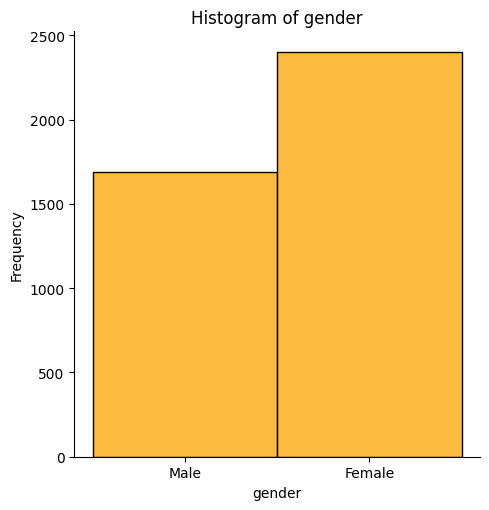

<Figure size 800x600 with 0 Axes>

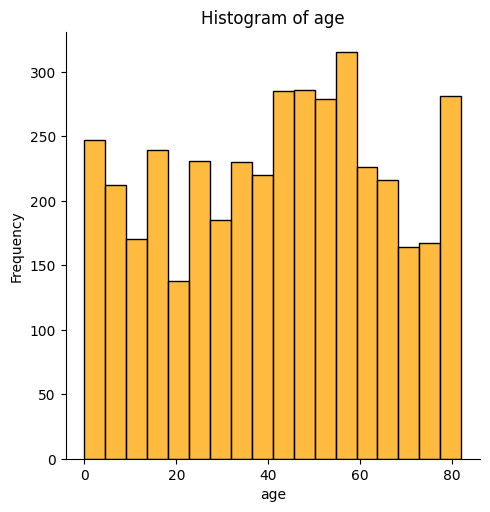

<Figure size 800x600 with 0 Axes>

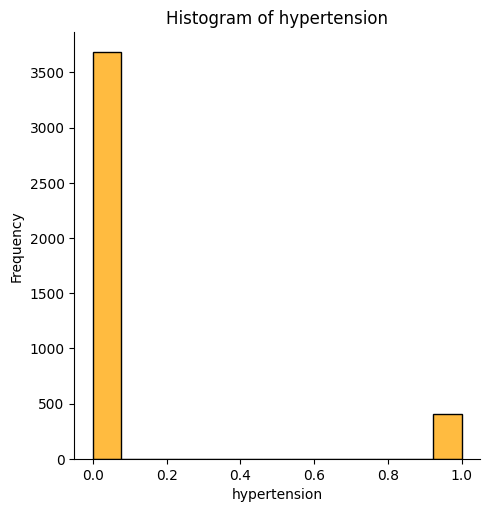

<Figure size 800x600 with 0 Axes>

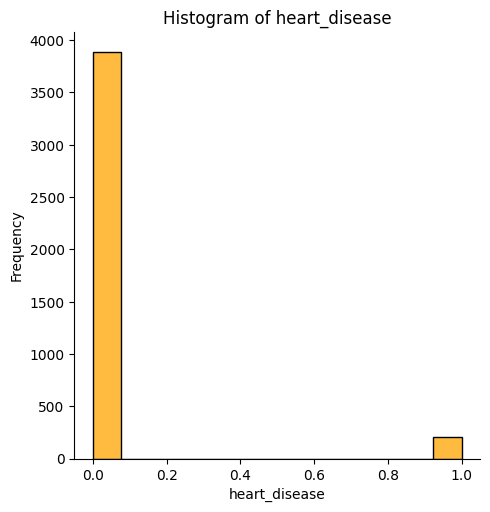

<Figure size 800x600 with 0 Axes>

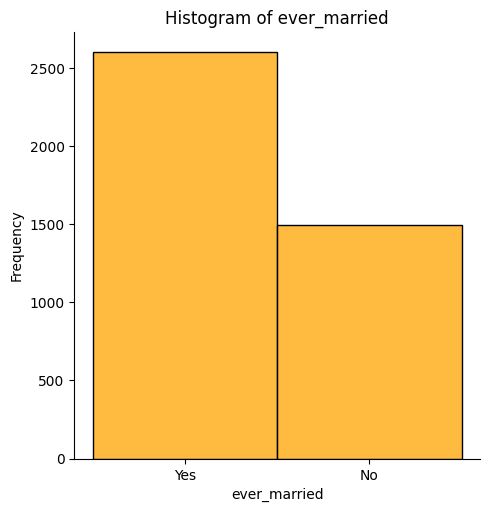

<Figure size 800x600 with 0 Axes>

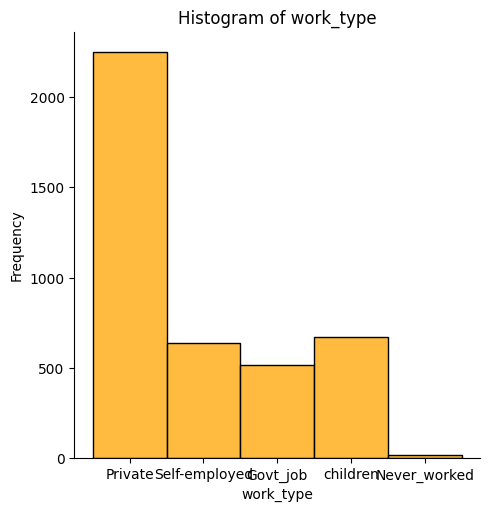

<Figure size 800x600 with 0 Axes>

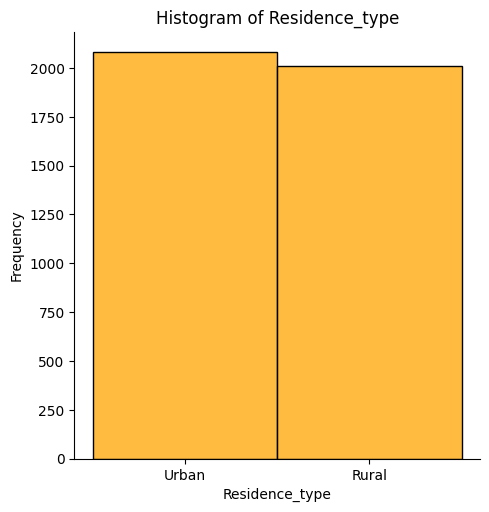

<Figure size 800x600 with 0 Axes>

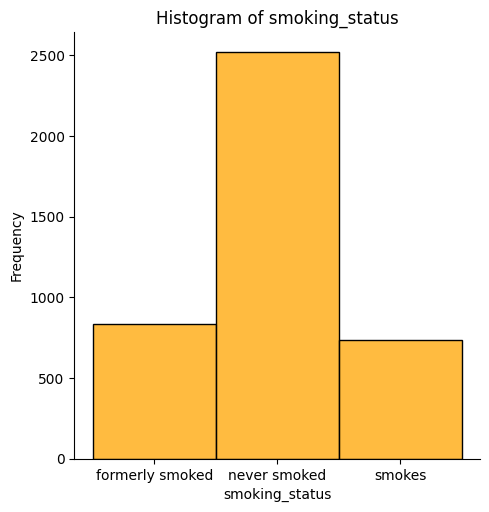

<Figure size 800x600 with 0 Axes>

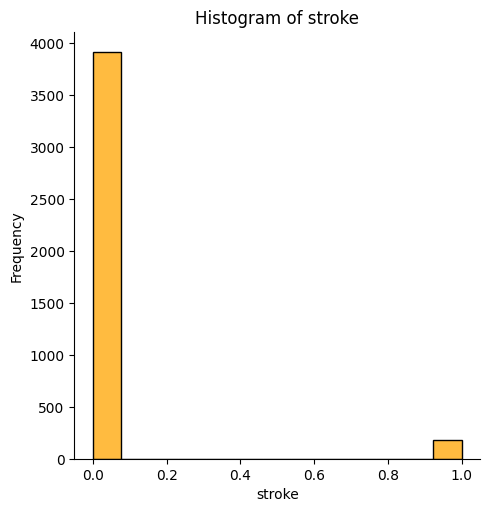

In [220]:
categorical = df.select_dtypes(include = ["int64","object"]).columns

for col in categorical :
    plt.figure(figsize=(8,6))
    sns.displot(data = df[col], color = "orange")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

### Datos numéricos

Asociados a valores continuos referentes a la edad, el nivel promedio de glucosa en sangre e índice de masa corporal.

<Figure size 800x600 with 0 Axes>

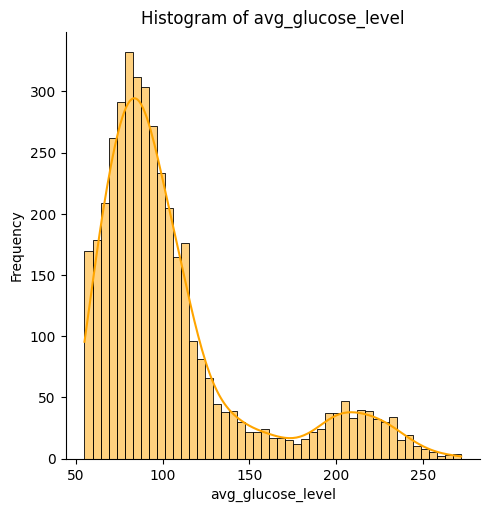

<Figure size 800x600 with 0 Axes>

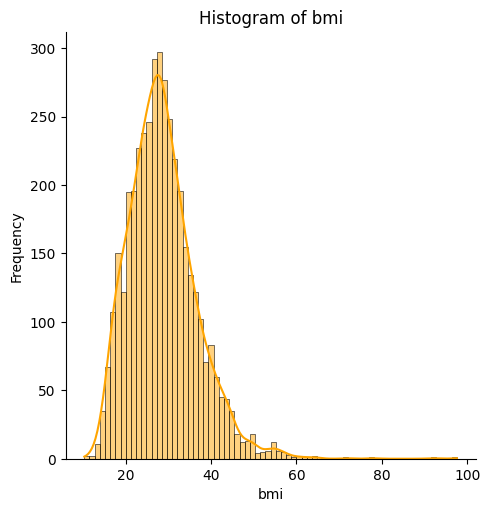

In [221]:
numeric_cols = df.select_dtypes(include = ["float64"]).columns

for col in numeric_cols :
    plt.figure(figsize=(8,6))
    sns.displot(data = df[col], kde = True , color = "orange")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

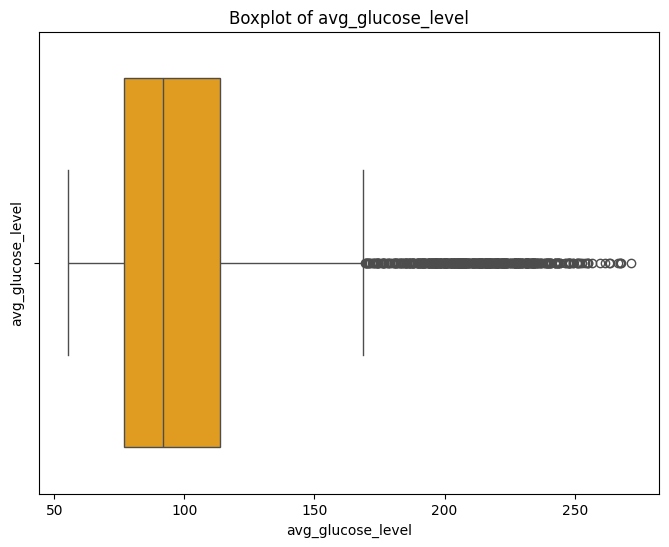

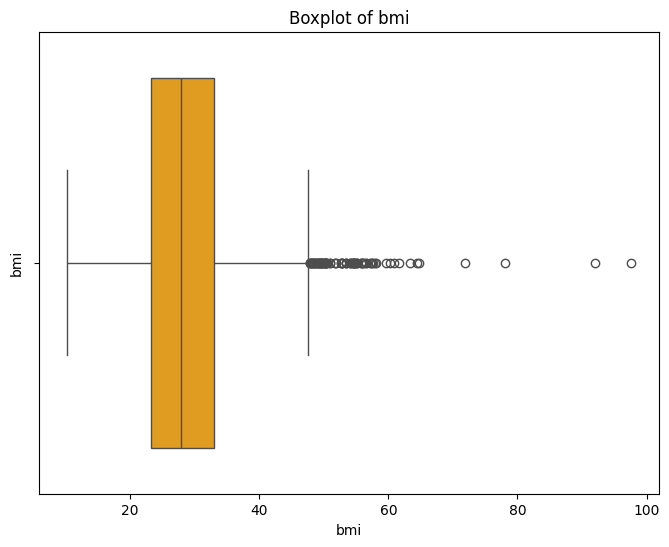

In [222]:
numeric_cols = df.select_dtypes(include = ["float"]).columns

for col in numeric_cols :
    plt.figure(figsize=(8,6))
    sns.boxplot(data = df[col] , orient = "h" , color = "orange")
    plt.ylabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()

### Análisis Bivariado

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

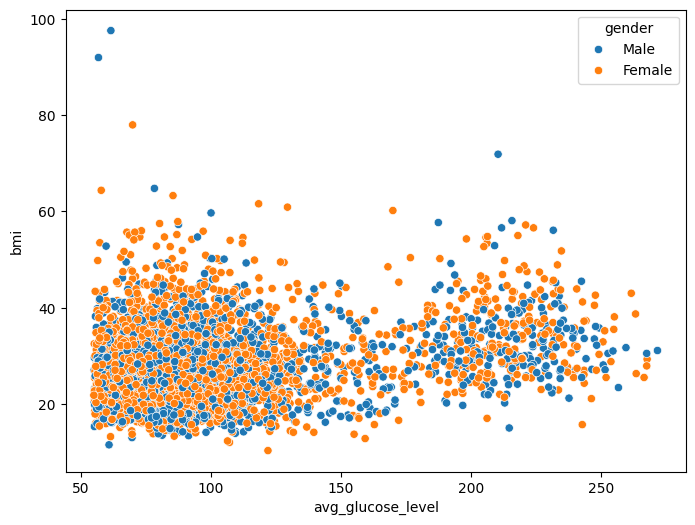

In [223]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df , x = "avg_glucose_level" , y = "bmi" , hue = "gender")

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

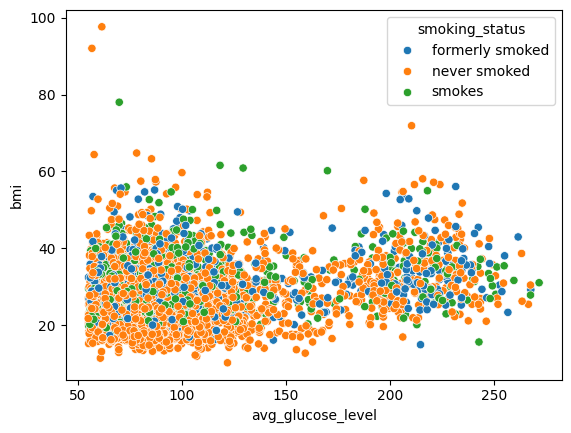

In [224]:
sns.scatterplot(data = df , x = "avg_glucose_level" , y = "bmi" , hue = "smoking_status")

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

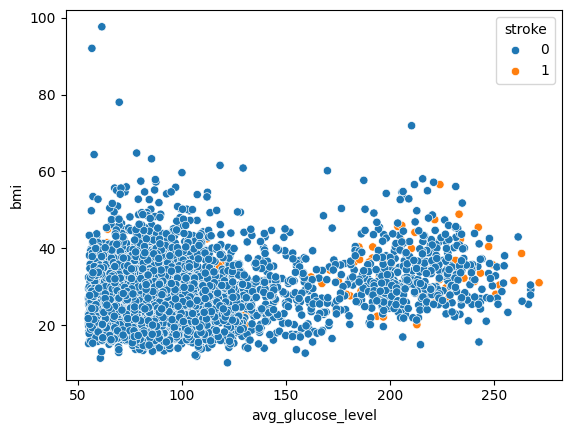

In [225]:
sns.scatterplot(data = df , x = "avg_glucose_level" , y = "bmi" , hue = "stroke")

## Preprocesamiento

In [226]:
veri = df.copy()

In [227]:
#one hot encoding
selected_cols = veri[["gender" , "ever_married" , "work_type" , "Residence_type" , "smoking_status"]]
selected_cols = pd.get_dummies(selected_cols)
selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 5108
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender_Female                   4091 non-null   bool 
 1   gender_Male                     4091 non-null   bool 
 2   ever_married_No                 4091 non-null   bool 
 3   ever_married_Yes                4091 non-null   bool 
 4   work_type_Govt_job              4091 non-null   bool 
 5   work_type_Never_worked          4091 non-null   bool 
 6   work_type_Private               4091 non-null   bool 
 7   work_type_Self-employed         4091 non-null   bool 
 8   work_type_children              4091 non-null   bool 
 9   Residence_type_Rural            4091 non-null   bool 
 10  Residence_type_Urban            4091 non-null   bool 
 11  smoking_status_formerly smoked  4091 non-null   bool 
 12  smoking_status_never smoked     4091 non-null   bool 
 13  smoking_

In [228]:
veri = veri.drop(columns = ["gender" ,"ever_married" , "work_type" , "Residence_type" , "smoking_status"])
veri = pd.concat ([selected_cols,veri] , axis = 1)
veri.reset_index(drop=True, inplace=True)
veri

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,False,True,False,True,False,False,True,False,False,False,True,True,False,False,67,0,1,228.69,36.6,1
1,False,True,False,True,False,False,True,False,False,True,False,False,True,False,80,0,1,105.92,32.5,1
2,True,False,False,True,False,False,True,False,False,False,True,False,False,True,49,0,0,171.23,34.4,1
3,True,False,False,True,False,False,False,True,False,True,False,False,True,False,79,1,0,174.12,24.0,1
4,False,True,False,True,False,False,True,False,False,False,True,True,False,False,81,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,True,False,False,True,False,False,True,False,False,True,False,False,True,False,57,0,0,77.93,21.7,0
4087,True,False,True,False,False,False,False,False,True,True,False,False,True,False,13,0,0,103.08,18.6,0
4088,True,False,False,True,False,False,False,True,False,False,True,False,True,False,81,0,0,125.20,40.0,0
4089,True,False,False,True,False,False,False,True,False,True,False,False,True,False,35,0,0,82.99,30.6,0


In [229]:
from sklearn.preprocessing import StandardScaler
# estandarizacion variables numericas
numeric_cols = ['avg_glucose_level', 'bmi']
scaler=StandardScaler()
veri[numeric_cols]=scaler.fit_transform(veri[numeric_cols])
veri.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,False,True,False,True,False,False,True,False,False,False,True,True,False,False,67,0,1,2.723373,0.998360,1
1,False,True,False,True,False,False,True,False,False,True,False,False,True,False,80,0,1,0.002793,0.482357,1
2,True,False,False,True,False,False,True,False,False,False,True,False,False,True,49,0,0,1.450061,0.721480,1
3,True,False,False,True,False,False,False,True,False,True,False,False,True,False,79,1,0,1.514103,-0.587406,1
4,False,True,False,True,False,False,True,False,False,False,True,True,False,False,81,0,0,1.782017,0.041866,1


In [230]:
correlation = veri.corr()
correlation

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender_Female,1.000000,-1.000000,-0.044749,0.044749,0.007341,-0.019560,0.051034,0.028531,-0.099409,-0.005199,0.005199,-0.040703,0.041805,-0.010212,0.036105,-0.020262,-0.082888,-0.051571,0.033536,-0.000766
gender_Male,-1.000000,1.000000,0.044749,-0.044749,-0.007341,0.019560,-0.051034,-0.028531,0.099409,0.005199,-0.005199,0.040703,-0.041805,0.010212,-0.036105,0.020262,0.082888,0.051571,-0.033536,0.000766
ever_married_No,-0.044749,0.044749,1.000000,-1.000000,-0.147128,0.092509,-0.199517,-0.206329,0.584611,0.009734,-0.009734,-0.213961,0.283598,-0.134498,-0.701969,-0.178034,-0.119308,-0.167263,-0.375832,-0.111157
ever_married_Yes,0.044749,-0.044749,-1.000000,1.000000,0.147128,-0.092509,0.199517,0.206329,-0.584611,-0.009734,0.009734,0.213961,-0.283598,0.134498,0.701969,0.178034,0.119308,0.167263,0.375832,0.111157
work_type_Govt_job,0.007341,-0.007341,-0.147128,0.147128,1.000000,-0.026629,-0.419380,-0.163153,-0.168281,-0.009792,0.009792,0.037532,-0.061442,0.038396,0.146705,0.030467,0.009712,0.026555,0.095281,0.000610
work_type_Never_worked,-0.019560,0.019560,0.092509,-0.092509,-0.026629,1.000000,-0.077372,-0.030100,-0.031047,-0.019848,0.019848,-0.035522,0.055399,-0.032856,-0.078235,-0.023361,-0.016181,-0.014208,-0.024500,-0.015080
work_type_Private,0.051034,-0.051034,-0.199517,0.199517,-0.419380,-0.077372,1.000000,-0.474056,-0.488955,0.013216,-0.013216,0.050955,-0.146451,0.131920,0.169449,0.012045,0.025338,0.009770,0.233691,0.022899
work_type_Self-employed,0.028531,-0.028531,-0.206329,0.206329,-0.163153,-0.030100,-0.474056,1.000000,-0.190220,-0.009612,0.009612,0.111733,-0.091564,-0.001327,0.332692,0.110836,0.060806,0.083140,0.088063,0.064969
work_type_children,-0.099409,0.099409,0.584611,-0.584611,-0.168281,-0.031047,-0.488955,-0.190220,1.000000,0.004171,-0.004171,-0.204834,0.331097,-0.204200,-0.670248,-0.147628,-0.099245,-0.115669,-0.481054,-0.092091
Residence_type_Rural,-0.005199,0.005199,0.009734,-0.009734,-0.009792,-0.019848,0.013216,-0.009612,0.004171,1.000000,-1.000000,-0.006002,0.031393,-0.033441,-0.012731,0.003177,-0.010606,0.011180,0.005801,-0.004693


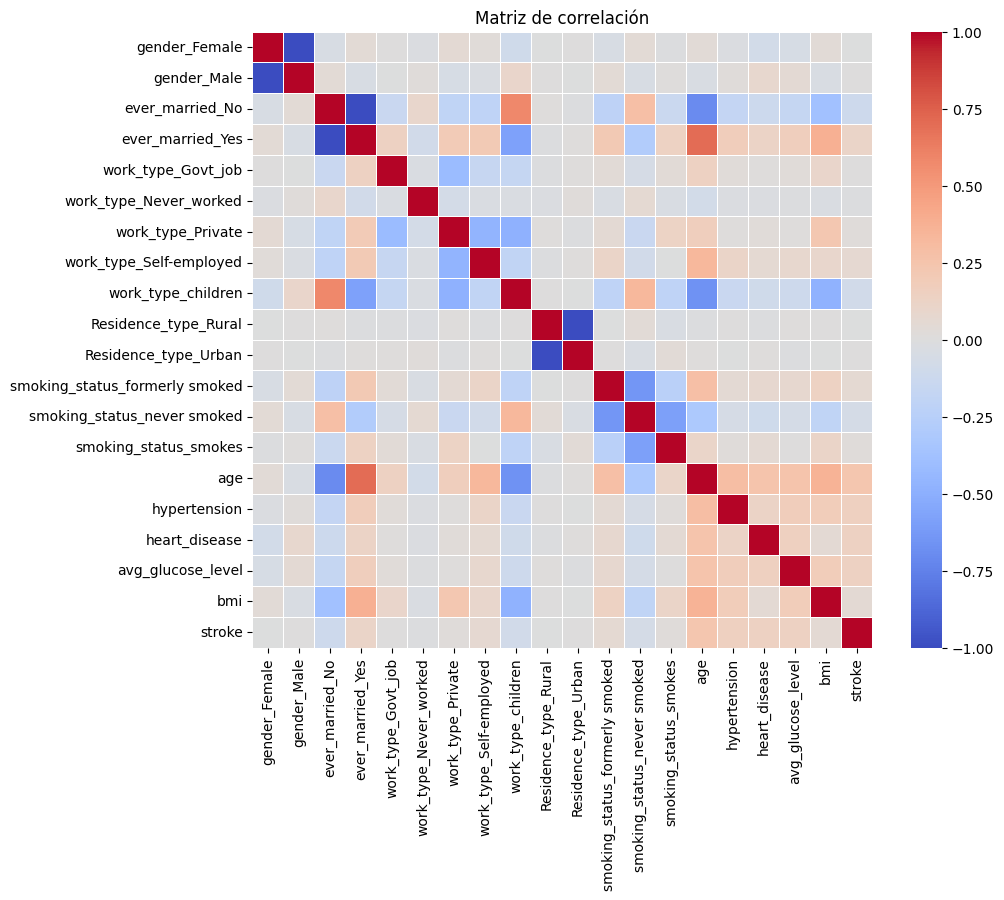

In [231]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation , cmap="coolwarm", linewidths = 0.5)
plt.title('Matriz de correlación')
plt.show()

## Selección de atributos

In [232]:
# Aplicar seleccion según correlación
correlationTarget=abs(correlation['stroke'])
relevantFeatures=correlationTarget[correlationTarget>0.1]
print("Atributos relevantes basados en la correlación con el stroke o variable objetivo:")
print(relevantFeatures)

Atributos relevantes basados en la correlación con el stroke o variable objetivo:
ever_married_No      0.111157
ever_married_Yes     0.111157
age                  0.240150
hypertension         0.154169
heart_disease        0.145575
avg_glucose_level    0.145612
stroke               1.000000
Name: stroke, dtype: float64


In [233]:
# Ganancia de información
from sklearn.feature_selection import mutual_info_classif

# calculo de ganancia de info de cada atributo
X=veri.drop(columns=['stroke'])
y=veri['stroke']
infoGain=mutual_info_classif(X,y)

# Dataframe 
infoGainDF=pd.DataFrame({"Feature":X.columns, "InfoGain":infoGain})
infoGainDF=infoGainDF.sort_values(by="InfoGain",ascending=False)
print('Atributos ordenados por Ganancia de Informacion')
print(infoGainDF)

Atributos ordenados por Ganancia de Informacion
                           Feature  InfoGain
14                             age  0.033738
3                 ever_married_Yes  0.009845
2                  ever_married_No  0.008867
8               work_type_children  0.008852
17               avg_glucose_level  0.005739
16                   heart_disease  0.005429
9             Residence_type_Rural  0.004917
15                    hypertension  0.004489
12     smoking_status_never smoked  0.003978
18                             bmi  0.003771
6                work_type_Private  0.002290
7          work_type_Self-employed  0.002045
1                      gender_Male  0.000550
4               work_type_Govt_job  0.000513
0                    gender_Female  0.000288
10            Residence_type_Urban  0.000000
5           work_type_Never_worked  0.000000
13           smoking_status_smokes  0.000000
11  smoking_status_formerly smoked  0.000000


In [234]:
# Basado en consistencia
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar los 6 mejores atributos basados en su consistencia con la clase
selector=SelectKBest(score_func=f_classif,k=6)
selector.fit(X,y)
consistentFeatures=X.columns[selector.get_support()]
print("Atributos por consistencia")
print(consistentFeatures)

Atributos por consistencia
Index(['ever_married_No', 'ever_married_Yes', 'age', 'hypertension',
       'heart_disease', 'avg_glucose_level'],
      dtype='object')


In [235]:
# Comparacion y seleccion general
selectedFeatures=set(relevantFeatures.index).intersection(consistentFeatures).intersection(infoGainDF["Feature"])
print("Atributos seleccionados en comun por los tres metodos")
print(selectedFeatures)

Atributos seleccionados en comun por los tres metodos
{'ever_married_No', 'avg_glucose_level', 'ever_married_Yes', 'hypertension', 'age', 'heart_disease'}


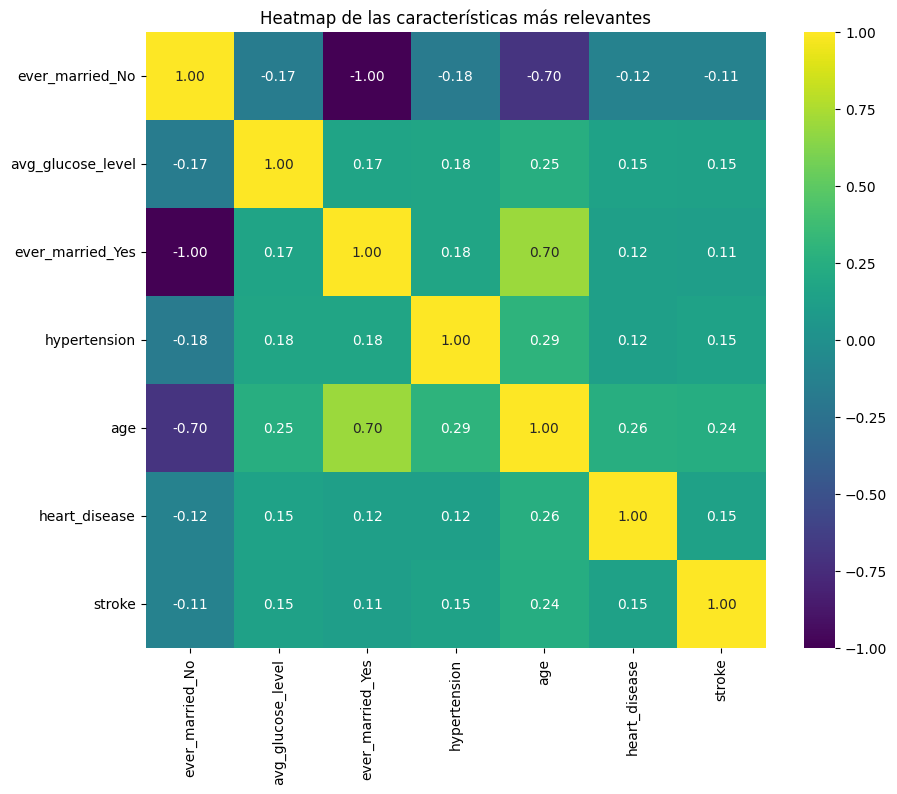

In [236]:
#subconjunto del DataFrame con caracteristicas seleccionadas
selectedDF=veri[list(selectedFeatures)+['stroke']]

#calcular matriz de correlacion para las caracteristicas
correlationMatrixSelected=selectedDF.corr()

# mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlationMatrixSelected,annot=True, cmap='viridis', fmt='.2f')
plt.title("Heatmap de las características más relevantes")
plt.show()

## Red Neural

In [237]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers

In [238]:
model = keras.Sequential([
    layers.Input(shape=(len(selectedFeatures),)),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selectedDF.drop('stroke', axis=1), selectedDF['stroke'], test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=40, validation_split=0.2)

# Guardar el modelo
model.save('stroke_prediction_model.keras')

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6066 - loss: 0.9478 - val_accuracy: 0.9634 - val_loss: 0.6655
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9582 - loss: 0.6591 - val_accuracy: 0.9634 - val_loss: 0.6385
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9527 - loss: 0.6333 - val_accuracy: 0.9634 - val_loss: 0.6123
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9611 - loss: 0.6064 - val_accuracy: 0.9634 - val_loss: 0.5873
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.5839 - val_accuracy: 0.9634 - val_loss: 0.5635
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.5588 - val_accuracy: 0.9634 - val_loss: 0.5410
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.5395 - val_accuracy: 0.9634 - val_loss: 0.5197
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9550 - loss: 0.5182 - val_accuracy: 0.9634 - v

## Evaluación

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [240]:
# Predecir las etiquetas para el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

# Calcular métricas
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print('Matriz de Confusión:')
print(conf_matrix)

print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión:
[[770   0]
 [ 49   0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       770
           1       0.00      0.00      0.00        49

    accuracy                           0.94       819
   macro avg       0.47      0.50      0.48       819
weighted avg       0.88      0.94      0.91       819



d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Uso de Dropout y L2

In [241]:
model = keras.Sequential([
    layers.Input(shape=(len(selectedFeatures),)),
    layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Penalización L2
    layers.Dropout(0.3),  # Aplicar Dropout con una tasa del 30%
    layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Penalización L2
    layers.Dropout(0.3),  # Aplicar Dropout con una tasa del 30%
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(selectedDF.drop('stroke', axis=1), selectedDF['stroke'], test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=40, validation_split=0.2)

# Guardar el modelo
model.save('stroke_prediction_model.keras')


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7846 - loss: 1.3475 - val_accuracy: 0.9618 - val_loss: 0.7671
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8310 - loss: 0.8873 - val_accuracy: 0.9634 - val_loss: 0.7192
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - loss: 0.7585 - val_accuracy: 0.9634 - val_loss: 0.6773
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9227 - loss: 0.6870 - val_accuracy: 0.9634 - val_loss: 0.6398
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9212 - loss: 0.6457 - val_accuracy: 0.9634 - val_loss: 0.6065
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9288 - loss: 0.5876 - val_accuracy: 0.9634 - val_loss: 0.5764
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.5549 - val_accuracy: 0.9634 - val_loss: 0.5486
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.5246 - val_accuracy: 0.9634 - v

In [242]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Matriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Matriz de Confusión:
[[770   0]
 [ 49   0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       770
           1       0.00      0.00      0.00        49

    accuracy                           0.94       819
   macro avg       0.47      0.50      0.48       819
weighted avg       0.88      0.94      0.91       819



d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
